In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/kaggle/input/333-dataset/all_call_stages.csv')
print(data.head())

/tmp/ipykernel_30/2254765088.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/kaggle/input/333-dataset/all_call_stages.csv')


   id  gender physically_challenged    division  district city  \
0   1     NaN                    No         NaN       NaN  NaN   
1   2    Male                   Yes  Mymensingh   Sherpur  NaN   
2   3    Male                    No  Chittagong   Comilla  NaN   
3   4  Female                    No       Dhaka  Faridpur  NaN   
4   5  Female                    No       Dhaka  Faridpur  NaN   

          upazila        municipality ward mauza village location comments  \
0             NaN                 NaN  NaN   NaN     NaN      NaN      NaN   
1   Sherpur Sadar  Sherpur Pourasabha  NaN   NaN     NaN      NaN      NaN   
2           Titas                 NaN  NaN   NaN     NaN      NaN      NaN   
3  Faridpur Sadar                 NaN  NaN   NaN     NaN      NaN      NaN   
4  Faridpur Sadar                 NaN  NaN   NaN     NaN      NaN      NaN   

                                pcqc                scqc  \
0  No Response and Disconnected Call  Mute Or Blank Call   
1  No Response

In [3]:
# Display basic information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833671 entries, 0 to 1833670
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   gender                 object 
 2   physically_challenged  object 
 3   division               object 
 4   district               object 
 5   city                   object 
 6   upazila                object 
 7   municipality           object 
 8   ward                   object 
 9   mauza                  object 
 10  village                object 
 11  location               object 
 12  comments               object 
 13  pcqc                   object 
 14  scqc                   object 
 15  call_type              object 
 16  answered_at            object 
 17  call_duration_min      float64
 18  event_date             object 
dtypes: float64(1), int64(1), object(17)
memory usage: 265.8+ MB
None


In [4]:
data.shape

(1833671, 19)

### Data Clean

In [5]:
# Drop colloums
data = data.drop(['municipality','ward','mauza','village','location','comments'], axis=1)

In [6]:
# Changed Date time to adjust GMT
data['answered_at'] = pd.to_datetime(data['answered_at'])
data['answered_at'] = data['answered_at'] + pd.Timedelta(hours=6)

In [7]:
print(data.head())

   id  gender physically_challenged    division  district city  \
0   1     NaN                    No         NaN       NaN  NaN   
1   2    Male                   Yes  Mymensingh   Sherpur  NaN   
2   3    Male                    No  Chittagong   Comilla  NaN   
3   4  Female                    No       Dhaka  Faridpur  NaN   
4   5  Female                    No       Dhaka  Faridpur  NaN   

          upazila                               pcqc                scqc  \
0             NaN  No Response and Disconnected Call  Mute Or Blank Call   
1   Sherpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
2           Titas  No Response and Disconnected Call  Mute Or Blank Call   
3  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
4  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   

                           call_type         answered_at  call_duration_min  \
0  No Response and Disconnected Call 2024-01-01 05:56:50           

In [8]:
data.dropna(subset=['gender'], inplace=True) 

In [9]:
data.shape

(1218223, 13)

In [10]:
print(data.head())

   id  gender physically_challenged    division      district city  \
1   2    Male                   Yes  Mymensingh       Sherpur  NaN   
2   3    Male                    No  Chittagong       Comilla  NaN   
3   4  Female                    No       Dhaka      Faridpur  NaN   
4   5  Female                    No       Dhaka      Faridpur  NaN   
6   7    Male                    No  Chittagong  Khagrachhari  NaN   

          upazila                               pcqc                scqc  \
1   Sherpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
2           Titas  No Response and Disconnected Call  Mute Or Blank Call   
3  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
4  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
6       Matiranga  No Response and Disconnected Call  Mute Or Blank Call   

                           call_type         answered_at  call_duration_min  \
1  No Response and Disconnected Call 2024-0

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Removed unnecessary columns as they will not be useful for analysis.</div>

In [11]:
# import pandas as pd
# import math

# # Number of rows per file 
# rows_per_file = 610000

# # Calculate the number of files needed
# num_files = math.ceil(len(data) / rows_per_file)

# # Split and save the DataFrame
# for i in range(num_files):
#     start_idx = i * rows_per_file
#     end_idx = min((i + 1) * rows_per_file, len(data))
    
#     # Get the chunk of data
#     chunk = data.iloc[start_idx:end_idx]
    
#     # Create the filename with index
#     filename = f'call_stages_part_{i+1}.csv'
    
#     # Save to CSV
#     chunk.to_csv(filename, index=False)
#     print(f'Saved {filename} with {len(chunk)} rows')

# print(f'\nTotal files created: {num_files}')

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Above code can be used if we want to see data in CSV files as it can only show 10,00,000 data at a time. </div>

### Call Type By District

In [12]:
caller_type_district = data.groupby(['district', 'call_type']).size().unstack(fill_value=0)
caller_type_district

call_type,Application Assistance,Complain,Complaint Customer Experience,Complaints,Emergency Assistance,Helpline,Incomplete_Complaints,Ministry of Disaster Management and Relief(modmr),No Response and Disconnected Call,Prank Call,Queries,Query
district,,,,,,,,,,,,
Bagerhat,0,3,0,111,4,346,37,0,2196,231,4816,0
Bandarban,1,0,0,13,1,87,13,0,660,61,1168,0
Barguna,1,3,0,82,2,229,25,1,1583,97,3085,0
Barisal,2,0,0,189,6,639,80,0,4616,453,9408,1
Bhola,0,4,0,114,16,485,63,0,3651,225,6659,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Sirajganj,1,0,0,308,12,542,60,0,7558,229,11763,2
Sunamganj,1,0,0,253,3,437,78,0,3241,168,5199,0
Sylhet,0,0,0,2668,6,1241,321,0,9387,605,16792,2


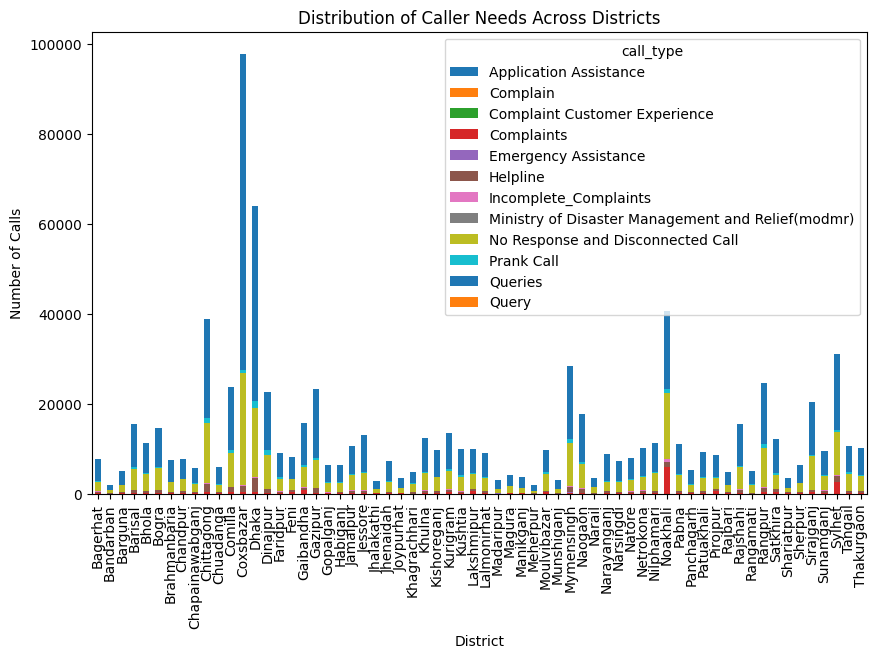

In [13]:
caller_type_district.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Caller Needs Across Districts")
plt.xlabel("District")
plt.ylabel("Number of Calls")
plt.show()

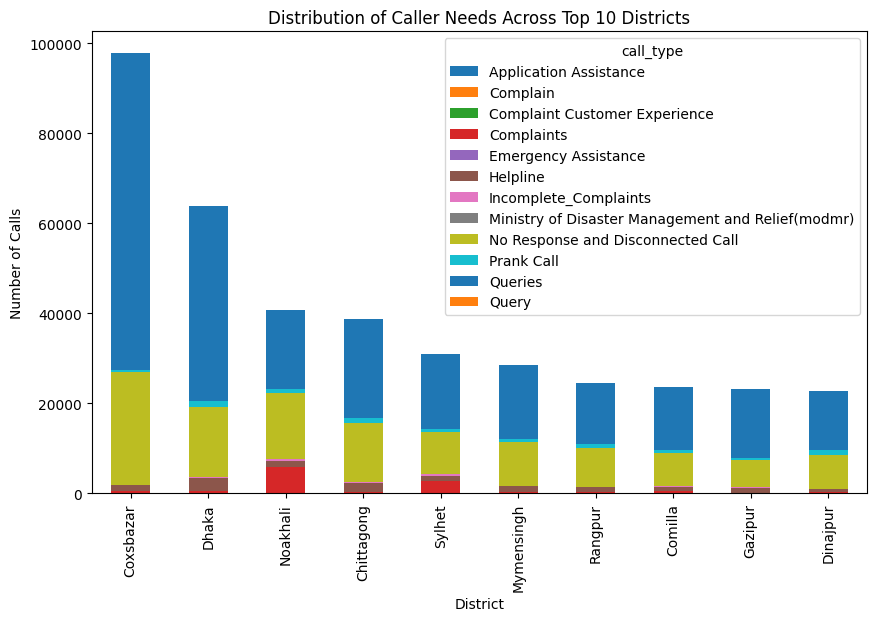

In [14]:
# Show only the top 10 districts by call volume
top_districts = caller_type_district.sum(axis=1).nlargest(10).index
filtered_data = caller_type_district.loc[top_districts]

# Plot the filtered data
filtered_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Caller Needs Across Top 10 Districts")
plt.xlabel("District")
plt.ylabel("Number of Calls")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Shows the distribution among the districts based on call types. The stacked bar chart shows the top 10 districts with the most calls. </div>

### Analysis of Unrelated Calls

In [15]:
# Count the number of occurrences for three conditions
query_not_related_count = data[data['pcqc'].isin(["Query Not Related To 333 Service", "No Response and Disconnected Call", "Prank Call"])].shape[0]

# Print the result
print("Count of 'Query Not Related To 333 Service', 'No Response and Disconnected Call' and 'Prank Call':", query_not_related_count)

Count of 'Query Not Related To 333 Service', 'No Response and Disconnected Call' and 'Prank Call': 687453


In [16]:
# Percentage of "Query Not Related To 333 Service"
total_queries = data.shape[0]
percentage_not_related = (query_not_related_count / total_queries) * 100
print(f"Percentage of 'Query Not Related To 333 Service': {percentage_not_related:.2f}%")

Percentage of 'Query Not Related To 333 Service': 56.43%


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>The Unrelated calls consist of Query Not Related To 333 Service, No Response or Disconnected Call, and Prank Call. We can see that more than half of the calls are unrelated with 56.43% of calls. </div>

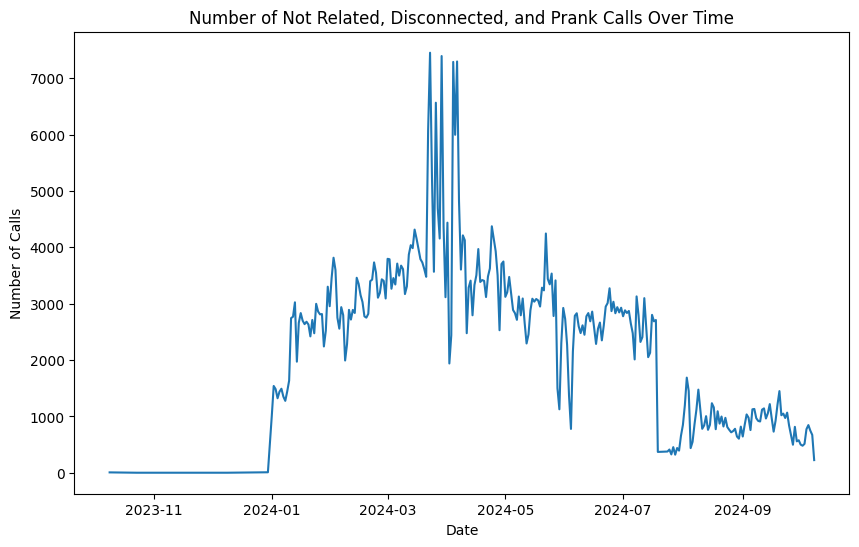

In [17]:
data['answered_at'] = pd.to_datetime(data['answered_at'])

# Filter rows where 'pcqc' is either "Query Not Related To 333 Service", "No Response and Disconnected Call", or "Prank Call"
not_related_df = data[data['pcqc'].isin(["Query Not Related To 333 Service", 
                                         "No Response and Disconnected Call", 
                                         "Prank Call"])]

# Group by the date part of 'answered_at' and count occurrences
calls_over_time = not_related_df.groupby(not_related_df['answered_at'].dt.date).size()

# Plotting the line chart
calls_over_time.plot(kind='line', figsize=(10, 6))

# Adding labels and title
plt.title("Number of Not Related, Disconnected, and Prank Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")

# Show the plot 
plt.show()

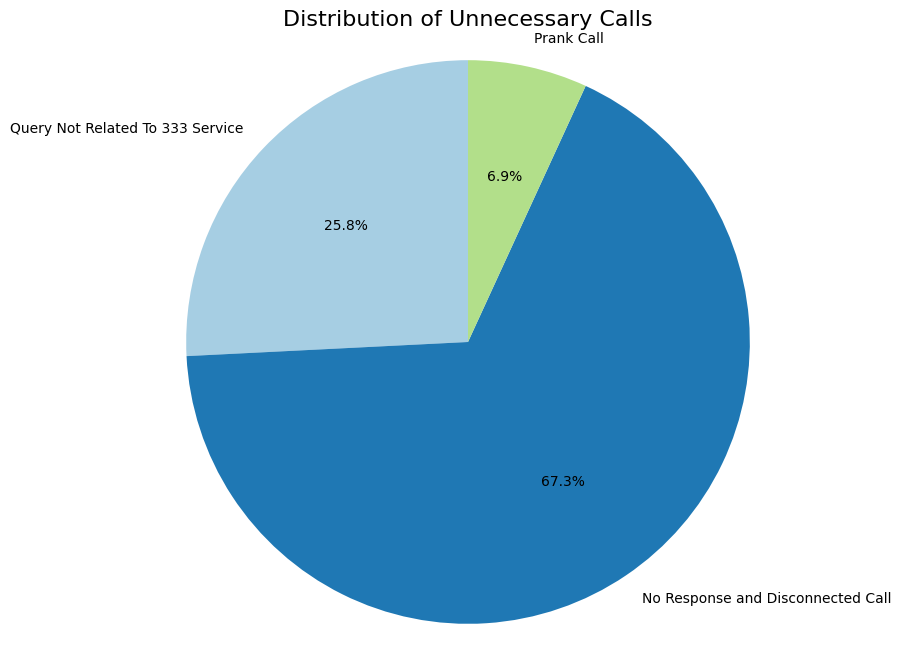

In [18]:
# Count the number of each type of unnecessary call
counts = data['pcqc'].value_counts().reindex(
    ["Query Not Related To 333 Service", "No Response and Disconnected Call", "Prank Call"],
    fill_value=0
)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Unnecessary Calls', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color: black;
                                                 border-color: black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>The Distribution of unnecessary calls shows that most are No Response and Disconnected Calls with 67.3% of calls.</div>

### Gender Based Analysis

In [19]:
# Count the number of males and females
gender_count = data['gender'].value_counts()
print(gender_count)
# Calculate percentage
gender_percentage = (gender_count / gender_count.sum()) * 100
print(gender_percentage)

gender
Male      985106
Female    233117
Name: count, dtype: int64
gender
Male      80.864177
Female    19.135823
Name: count, dtype: float64


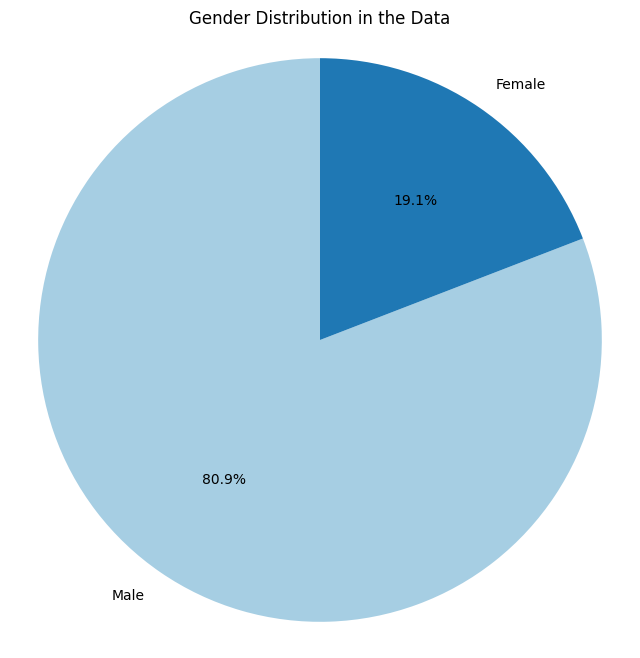

In [20]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Gender Distribution in the Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Most calls are from males with 80.0% being male whereas 19.1% being female.</div>

### Trends in the number of calls over time

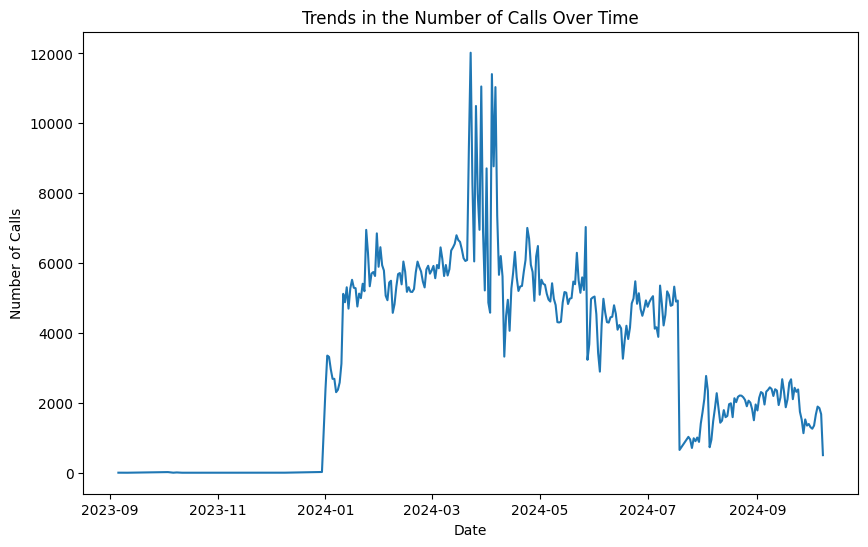

In [21]:
# Group by the date part of 'answered_at' and count the number of calls
data['answered_at'] = pd.to_datetime(data['answered_at'], errors='coerce') 
calls_over_time = data.groupby(data['answered_at'].dt.date).size()

# Plotting the line chart
calls_over_time.plot(kind='line', figsize=(10, 6))

# Adding labels and title
plt.title("Trends in the Number of Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.show()

### Analysis of Call Types

In [22]:
# Count the number of occurrences of each call type
call_type_count = data['call_type'].value_counts()
print(call_type_count)
print("--------------------------------------------------------------")
# Calculate the percentage of each call type
call_type_percentage = (call_type_count / call_type_count.sum()) * 100
print("Percentage of call types")
print(call_type_percentage)

call_type
Queries                                              650431
No Response and Disconnected Call                    462959
Helpline                                              44580
Prank Call                                            34784
Complaints                                            19382
Incomplete_Complaints                                  5423
Emergency Assistance                                    271
Complain                                                220
Application Assistance                                   88
Query                                                    71
Complaint Customer Experience                            12
Ministry of Disaster Management and Relief(modmr)         2
Name: count, dtype: int64
--------------------------------------------------------------
Percentage of call types
call_type
Queries                                              53.391785
No Response and Disconnected Call                    38.002812
Helpline            

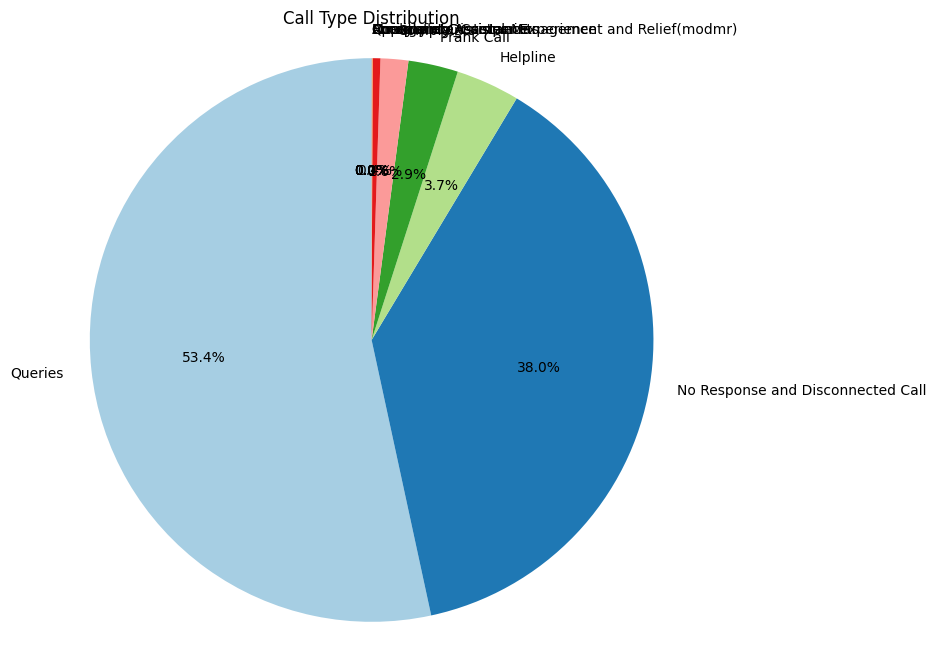

In [23]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(call_type_percentage, labels=call_type_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Call Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

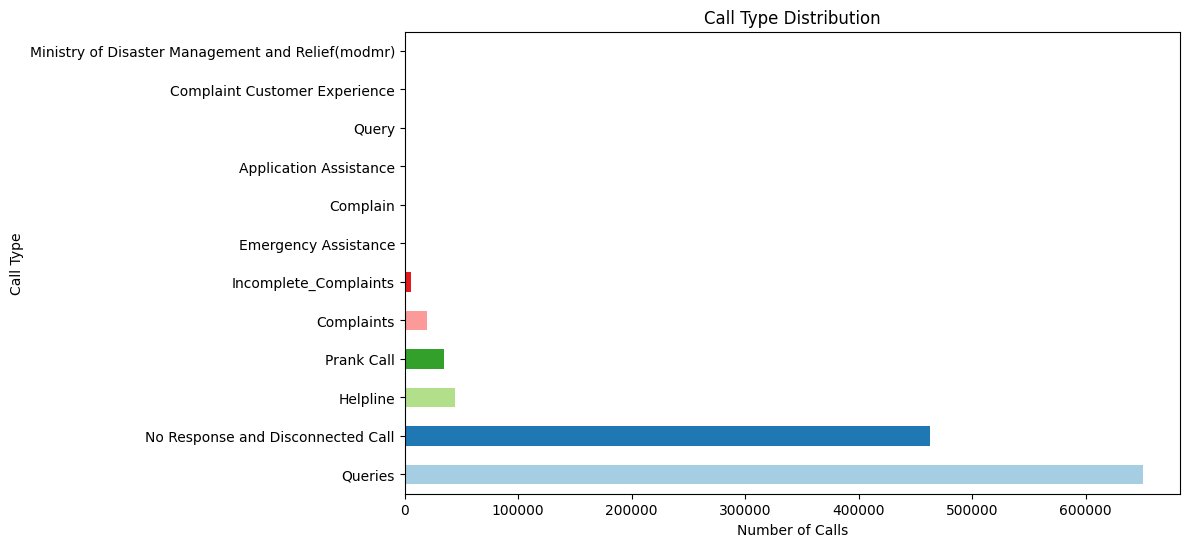

In [24]:
call_type_count.plot(kind='barh', figsize=(10, 6), color=plt.cm.Paired.colors)
plt.title('Call Type Distribution')
plt.xlabel('Number of Calls')
plt.ylabel('Call Type')
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Analysis of call types shows that most of the calls are queries followed by disconnected or no response calls and helplines. </div>

### Number of Calls based on time segment

time_segment
Afternoon (5 PM - 9 PM)      327667
Late Night (12 AM - 5 AM)    343266
Morning (5 AM - 12 PM)        68629
Night (9 PM - 12 AM)         228582
Noon (12 PM - 5 PM)          250079
Name: count, dtype: int64


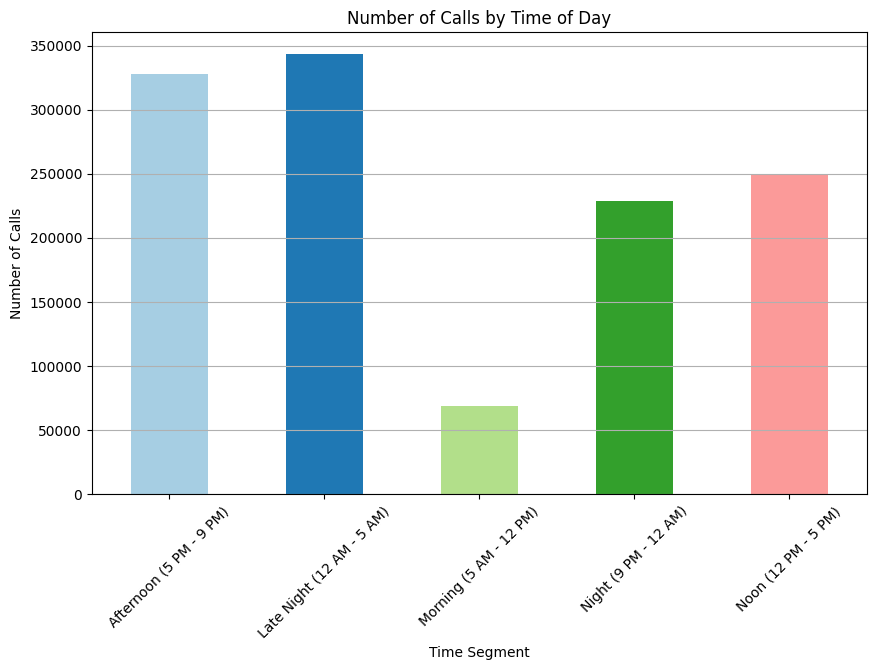

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'answered_at' to datetime
data['answered_at'] = pd.to_datetime(data['answered_at'], errors='coerce')

# Extract the hour from the 'answered_at' column
data['hour'] = data['answered_at'].dt.hour

# Define time segments
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning (5 AM - 12 PM)'
    elif 12 <= hour < 17:
        return 'Noon (12 PM - 5 PM)'
    elif 17 <= hour < 21:
        return 'Afternoon (5 PM - 9 PM)'
    elif 21 <= hour < 24:
        return 'Night (9 PM - 12 AM)'
    else:
        return 'Late Night (12 AM - 5 AM)'

# Apply the categorization function
data['time_segment'] = data['hour'].apply(categorize_time)

# Count the number of calls in each time segment
calls_by_time_segment = data['time_segment'].value_counts().sort_index()
print(calls_by_time_segment) 
# Plotting the results
plt.figure(figsize=(10, 6))
calls_by_time_segment.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Number of Calls by Time of Day')
plt.xlabel('Time Segment')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Used time segment to check when the most calls come and when the least call comes. Late night and Afternoon have the most amount of calls whereas Morning has the least amount of calls.  </div>

### Dropping some specific rows because of Disaster

In [26]:
data['answered_at'] = pd.to_datetime(data['answered_at'])

# Define the start and end date
start_date = '2024-08-23'
end_date = '2024-09-17'

# Filter the data between 23 August 2024 and 17 September 2024
filtered_data = data[(data['answered_at'] >= start_date) & 
                     (data['answered_at'] <= end_date)]

# Drop rows where 'scqc' contains 'Disaster'
filtered_data = filtered_data[~filtered_data['scqc'].str.contains('Disaster', case=False, na=False)]

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note: </b>Removed Disaster data rows located in scqc for predicting anomaly.</div>

In [27]:
data['call_duration_min'] = pd.to_numeric(data['call_duration_min'], errors='coerce')

# Create a new column 'anomaly' and mark calls less than 0.50 (30 seconds) as 1, others as 0
data['anomaly'] = (data['call_duration_min'] < 0.50).astype(int)

# Display the first few rows to check the new 'anomaly' column
print(data[['call_duration_min', 'anomaly']].head(20))

    call_duration_min  anomaly
1                0.58        0
2                0.10        1
3                0.35        1
4                0.30        1
6                0.00        1
8                0.13        1
9                0.07        1
10               0.27        1
13               0.00        1
14               0.25        1
15               0.25        1
17               0.30        1
20               0.25        1
21               0.00        1
22               0.02        1
23               0.02        1
26               1.33        0
27               0.08        1
28               0.00        1
29               0.00        1


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
color:black;
border-color:black;
border-radius:5px;
width:60%;
margin: auto;
text-align: left;">
<b>Note: </b>Considering calls less than 30 seconds as an anomaly.</div>

In [28]:
# Count the number of anomalies (sum of 'anomaly' column)
num_anomalies = data['anomaly'].sum()
# Display the result
print(f"Number of anomalies: {num_anomalies}")
data.head()

Number of anomalies: 530792


,id,gender,physically_challenged,division,district,city,upazila,pcqc,scqc,call_type,answered_at,call_duration_min,event_date,hour,time_segment,anomaly
1,2,Male,Yes,Mymensingh,Sherpur,NaN,Sherpur Sadar,No Response and Disconnected Call,Mute Or Blank Call,No Response and Disconnected Call,2024-01-01 05:51:17,0.58,2024-01-01,5.0,Morning (5 AM - 12 PM),0
2,3,Male,No,Chittagong,Comilla,NaN,Titas,No Response and Disconnected Call,Mute Or Blank Call,No Response and Disconnected Call,2024-01-01 05:53:19,0.10,2024-01-01,5.0,Morning (5 AM - 12 PM),1
3,4,Female,No,Dhaka,Faridpur,NaN,Faridpur Sadar,No Response and Disconnected Call,Mute Or Blank Call,No Response and Disconnected Call,2024-01-01 05:55:51,0.35,2024-01-01,5.0,Morning (5 AM - 12 PM),1
4,5,Female,No,Dhaka,Faridpur,NaN,Faridpur Sadar,No Response and Disconnected Call,Mute Or Blank Call,No Response and Disconnected Call,2024-01-01 05:57:36,0.30,2024-01-01,5.0,Morning (5 AM - 12 PM),1
6,7,Male,No,Chittagong,Khagrachhari,NaN,Matiranga,No Response and Disconnected Call,Mute Or Blank Call,No Response and Disconnected Call,2024-01-01 06:00:05,0.00,2024-01-01,6.0,Morning (5 AM - 12 PM),1


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data.drop(columns=['id', 'city', 'anomaly', 'answered_at', 'call_duration_min'])
y = data['anomaly']

# Splitting your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a ColumnTransformer to handle categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['gender', 'physically_challenged', 'division', 'district', 'pcqc', 'scqc', 'call_type', 'time_segment']),  # Encoding categorical variables
        ('num', SimpleImputer(strategy='mean'), ['hour'])  # Imputing missing numerical features
    ],
    remainder='drop'  # Drop other columns if any exist
)

# Creating a pipeline with preprocessing and Random Forest Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply transformations
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on the test set
test_score = pipeline.score(X_test, y_test)
print(f"Test accuracy: {test_score:.2f}")

# Feature importance can still be extracted from the classifier in the pipeline
# Accessing the classifier step of the pipeline
rf = pipeline.named_steps['classifier']

# Display feature importances
feature_importances = rf.feature_importances_
print("Feature importances:", feature_importances)

In [ ]:
# Accessing the classifier step of the pipeline to extract feature importances
rf = pipeline.named_steps['classifier']

# Display feature importances
feature_importances = rf.feature_importances_

# Get the feature names after encoding
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()  # Categorical features
numerical_features = ['hour']  # Add numerical feature
all_feature_names = list(feature_names) + numerical_features  # Combine them

# Present feature importance in a DataFrame
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importance_df)

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
color:black;
border-color:black;
border-radius:5px;
width:60%;
margin: auto;
text-align: left;">
<b>Note: Most important features are call type, PCQC, SCQC, district and hour of call. We will reduce less important features and work on more important features. </b></div>